## 가위바위보 분류기를 만들자

### 데이터 준비

In [1]:
#라이브러리 버전 확인 
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


1. 데이터 만들기
- 구글의 teachable machine 사용 
- 가위,바위,보 각 100장의 (224, 224, 3)이미지를 만들기 

2. 데이터 불러오기 _Resize하기
- 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만듦
-PIL 라이브러리 사용

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")


PIL 라이브러리 import 완료!


In [3]:

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")     

    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    
    successful_resizes = 0
    for img in images:
        try:
            old_img = Image.open(img)
            if old_img.mode != 'RGB':
                old_img = old_img.convert('RGB')
            new_img = old_img.resize(target_size, Image.ANTIALIAS)
            new_img.save(img, "JPEG")
            successful_resizes += 1
        except Exception as e:
            print(f"{img}를 리사이즈할 수 없습니다: {str(e)}")
    
    print(len(images), " images resized.")

# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1354  images to be resized.
1354  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1355  images to be resized.
1355  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1355  images to be resized.
1355  images resized.


3. load_data()함수 만들기
- 입력으로 이미지가 있는 폴더 위치를 받음
- 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [11]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수
import numpy as np

def load_data(img_path, number_of_data=4064):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train.astype('float32') /255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4064 입니다.
x_train shape: (4064, 28, 28, 3)
y_train shape: (4064,)


라벨:  0


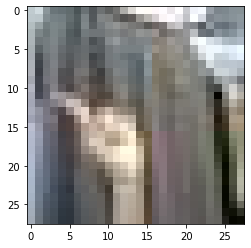

In [12]:
# 이미지 abs불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기


In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

### 딥러닝 네트워크 학습시키기


In [17]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)


Epoch 1/10
127/127 [==============================] - 6s 39ms/step - loss: 0.8975 - accuracy: 0.5458
Epoch 2/10
127/127 [==============================] - 5s 41ms/step - loss: 0.3984 - accuracy: 0.8381
Epoch 3/10
127/127 [==============================] - 5s 40ms/step - loss: 0.2200 - accuracy: 0.9250
Epoch 4/10
127/127 [==============================] - 5s 40ms/step - loss: 0.1421 - accuracy: 0.9530
Epoch 5/10
127/127 [==============================] - 5s 40ms/step - loss: 0.0931 - accuracy: 0.9683
Epoch 6/10
127/127 [==============================] - 5s 41ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 7/10
127/127 [==============================] - 5s 40ms/step - loss: 0.0463 - accuracy: 0.9882
Epoch 8/10
127/127 [==============================] - 5s 40ms/step - loss: 0.0419 - accuracy: 0.9862
Epoch 9/10
127/127 [==============================] - 5s 40ms/step - loss: 0.0238 - accuracy: 0.9943
Epoch 10/10
127/127 [==============================] - 5s 41ms/step - loss: 0.0234 - accura

### 얼마나 잘 만들었는지 확인하기(테스트)


1. 테스트데이터 x_test, y_test 만들기 

In [18]:
# # x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

resize_images(test_image_dir_path + "/scissor")
resize_images(test_image_dir_path + "/rock")
resize_images(test_image_dir_path + "/paper")


(x_test, y_test) = load_data(test_image_dir_path, number_of_data=300)
x_test_norm = x_test.astype('float32') / 255.0
x_test_norm.shape

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.


(300, 28, 28, 3)

2. test_accuracy를 측정


In [19]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.0745 - accuracy: 0.6267
test_loss: 1.07454252243042 
test_accuracy: 0.6266666650772095


### 더 좋은 네트워크 만들어보기


1. 학습데이터셋 추가
 가위,바위,보 학습데이터넷 총 4064개로 추가
 그루 데이터 + 캐글 데이터 
    

2. 하이퍼파라미터 조정


In [32]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          73792     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)               

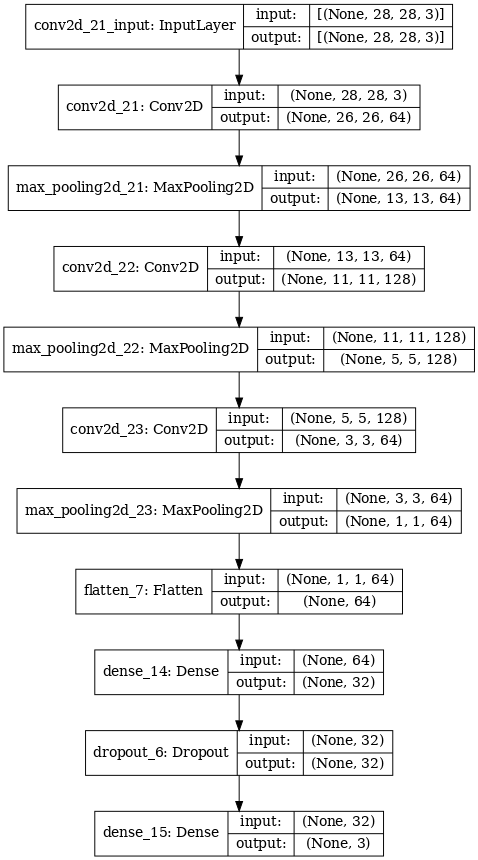

In [33]:
keras.utils.plot_model(model, show_shapes=True, dpi = 70)


In [34]:
from tensorflow.keras.callbacks import EarlyStopping


EPOCHS = 10
BATCH_SIZE = 100

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train,  epochs=EPOCHS, batch_size = BATCH_SIZE , validation_data = (x_test_norm, y_test))


Epoch 1/10
41/41 [==============================] - 11s 262ms/step - loss: 0.9649 - accuracy: 0.5258 - val_loss: 1.1130 - val_accuracy: 0.3533
Epoch 2/10
41/41 [==============================] - 11s 263ms/step - loss: 0.5811 - accuracy: 0.7493 - val_loss: 1.1832 - val_accuracy: 0.3333
Epoch 3/10
41/41 [==============================] - 11s 265ms/step - loss: 0.3812 - accuracy: 0.8438 - val_loss: 0.9774 - val_accuracy: 0.4467
Epoch 4/10
41/41 [==============================] - 11s 263ms/step - loss: 0.2661 - accuracy: 0.9053 - val_loss: 0.8548 - val_accuracy: 0.5900
Epoch 5/10
41/41 [==============================] - 11s 260ms/step - loss: 0.2600 - accuracy: 0.9050 - val_loss: 0.9304 - val_accuracy: 0.4967
Epoch 6/10
41/41 [==============================] - 11s 261ms/step - loss: 0.1623 - accuracy: 0.9478 - val_loss: 0.8303 - val_accuracy: 0.6067
Epoch 7/10
41/41 [==============================] - 11s 263ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.9051 - val_accuracy: 0.5300

In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 251.2144 - accuracy: 0.6133
test_loss: 251.2144012451172 
test_accuracy: 0.6133333444595337


### 시각화

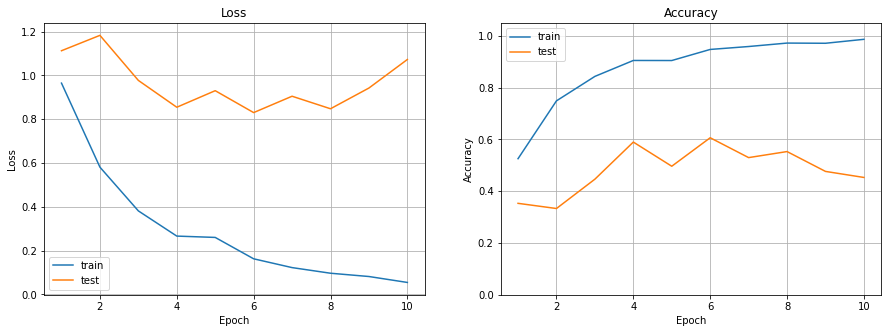

In [36]:
import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = range(1, EPOCHS+1)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'], hist['loss'], label='train')
plt.plot(hist['epoch'], hist['val_loss'], label = 'test')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['accuracy'], label='train')
plt.plot(hist['epoch'], hist['val_accuracy'], label='test')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()

학습데이터를 300개만 가지고 테스트를 했을때는 대략 30% 정도의 정확도가 나왔는데 
개선을 위한 방법으로 
1. 학습데이터를 대략 4000개로 추가시켰더니 62%로 정확도가 증가하였다. 
2. 배치정규화를 시켜보았는데 학습속도가 빨라진 것을 확인할 수 있었고 
3. 드롭아웃 레이어와 수치를 변경시켜보면서 정확도의 변화를 확인할 수 있었다.

하지만 아직도 모델의 성능을 개선하기 위한 방법을 찾지 못하여 오히려 하이퍼파라미터나 과적합 방지를 위한 모델들을 추가해봐도 정확도가 개선되지 않아 이미지 증강을 통한 데이터의 양을 더 추가시키고 정규화 등을 통한 데이터 처리 부분과 하이퍼 파라미터 및 여러 방법들의 상관관계에 대한 학습이 많이 필요하다 생각된다.  